# FOB Test of Rough LR Model Implementation
To Do:
- WHAT'S WRONG WITH THIS LOSS FUNCTION?
- Fix Divide by 0 Errors in loss function

## Setup and Library Imports

In [1]:
cd '/Users/shifraisaacs/Documents/GH/FOB_LR'

/Users/shifraisaacs/Documents/GH/FOB_LR


In [2]:
import sys
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

In [3]:
# Import Logistic Regression class from models/LR.py
sys.path.insert(0, 'models')
from LR import ScratchLogisticRegression

In [4]:
# Display entire dataframe
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

### Load Data

In [5]:
features = pd.read_csv('data/processed/features_encoded.csv', index_col=0)
features.head()

,instrumentalness,valence,total_words,duration_min,key_0,key_6,key_10,key_11,mode_minor,mode_major,class
0,0.000000,0.374,201,3.43,0.0,0.0,0.0,0.0,0.0,1.0,0
1,0.000251,0.464,289,4.73,0.0,0.0,0.0,0.0,0.0,1.0,0
2,0.000003,0.336,165,3.24,0.0,0.0,0.0,1.0,0.0,1.0,0
3,0.000000,0.268,249,3.62,0.0,0.0,0.0,0.0,0.0,1.0,0
4,0.000000,0.408,174,2.82,1.0,0.0,0.0,0.0,0.0,1.0,0


### Rough Model Test

In [6]:
y = features.pop('class')

In [7]:
X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.3, random_state=0)
y_test[:5]

45    0
60    0
7     0
51    0
66    0
Name: class, dtype: int64

In [8]:
lr = ScratchLogisticRegression()
lr.fit(X_train, y_train)

Successfully fit Logistic Regression model to input data.


In [9]:
predictions = lr.predict(X_test)
predictions[:5]

[0, 0, 0, 0, 0]

In [10]:
lr.metrics(y_test)

,Metric,Value
0,Accuracy,63.0%
1,Precision,100.0%
2,Recall,5.88%
3,F1 Score,5.56%


In [11]:
lr.confusion_matrix(y_test)

,,Actual
Index,,
Predicted,True,False
True,1,0
False,16,26


In [12]:
lr.feature_names_in_

['instrumentalness',
 'valence',
 'total_words',
 'duration_min',
 'key_0',
 'key_6',
 'key_10',
 'key_11',
 'mode_minor',
 'mode_major']

In [13]:
lr.n_features_in_

10

1.3438972638580438


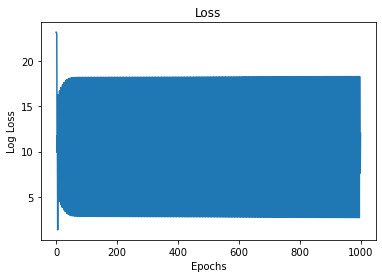

'Final Loss: 12.00'

In [14]:
print(min(lr.loss_history))
lr.plot_loss()

In [15]:
feature_weights = DataFrame({'feature' : features.columns, 'abs_weight' : abs(lr.weights)})
feature_weights.sort_values(by='abs_weight', ascending=True, inplace=True)
feature_weights

,feature,abs_weight
2,total_words,0.028727
9,mode_major,0.301652
4,key_0,0.397436
3,duration_min,0.411693
6,key_10,0.421152
0,instrumentalness,0.558846
5,key_6,0.672230
1,valence,0.683710
7,key_11,0.865741
8,mode_minor,0.996611
